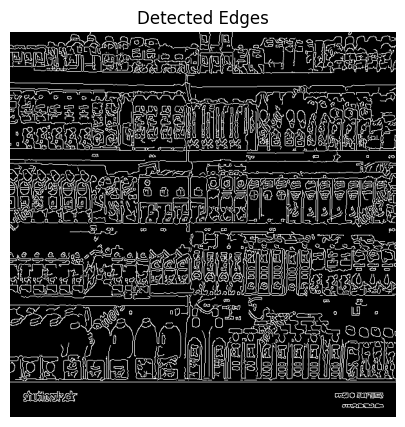

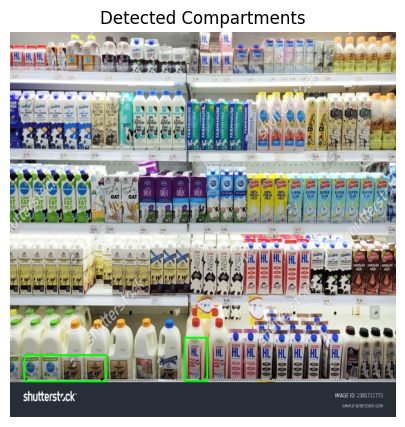

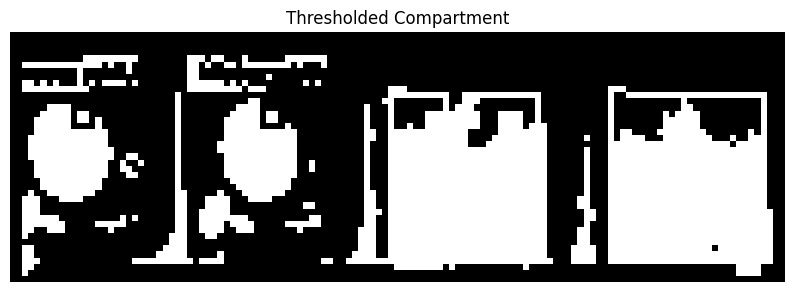

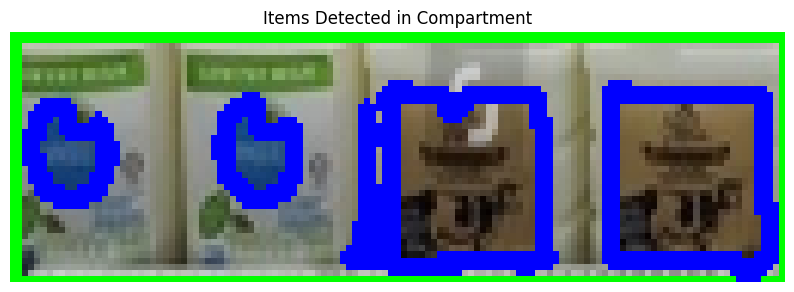

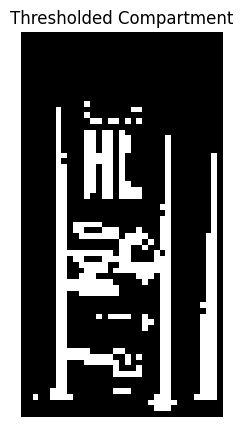

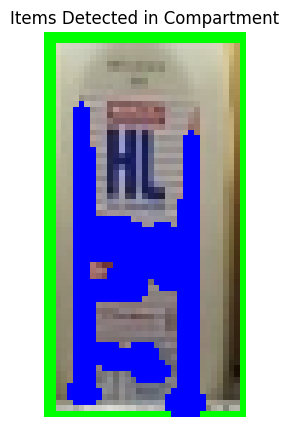

{'Compartment 1': 4, 'Compartment 2': 1}


In [8]:
# Step 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def show_image(title, image, cmap='gray'):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if cmap == 'gray' else image, cmap=cmap)
    plt.axis('off')
    plt.show()

# Function to load and process the image
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (600, 600))  # Resize for consistency
    return img

# Function to detect compartments using Canny Edge Detection
def detect_compartments(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    show_image("Detected Edges", edges)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    compartments = []

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 1000:  # Minimum area threshold for compartments
            x, y, w, h = cv2.boundingRect(contour)
            compartments.append((x, y, w, h))
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Draw rectangle around compartments

    show_image("Detected Compartments", image)
    return compartments

# Function to count items in each compartment
def count_items_in_compartment(compartment, image):
    x, y, w, h = compartment
    compartment_img = image[y:y+h, x:x+w]

    gray = cv2.cvtColor(compartment_img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

    show_image("Thresholded Compartment", thresh)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    item_count = 0

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 50:  # Minimum area threshold for items
            item_count += 1
            cv2.drawContours(compartment_img, [contour], -1, (255, 0, 0), 2)  # Draw contour around items

    show_image("Items Detected in Compartment", compartment_img)
    return item_count

# Main function to count items in compartments
def count_items(image_path):
    image = load_image(image_path)
    compartments = detect_compartments(image)

    counts = {}
    for i, compartment in enumerate(compartments):
        item_count = count_items_in_compartment(compartment, image)
        counts[f'Compartment {i+1}'] = item_count

    return counts

# Example usage
image_path = '/content/5.jpg'  # Replace with your actual file name
item_counts = count_items(image_path)
print(item_counts)
